In [1]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
pd.set_option('display.max_rows', 200)

In [3]:
df = pd.read_csv('/home/aish/data/movies_everaldo/movie_lens_genre_separated.tsv', sep='\t')
df_not_updated = pd.read_csv('/home/aish/data/movies_everaldo/movie_lens_genre_separated.tsv', sep='\t')
occupation_dict = { 
    0: "not specified", 
    1: "academic/educator",
    2:  "artist",
    3:  "clerical/admin",
    4:  "college/grad student",
    5:  "customer service",
    6:  "doctor/health care",
    7:  "executive/managerial",
    8:  "farmer",
    9:  "homemaker",
    10:  "K-12 student",
    11:  "lawyer",
    12:  "programmer",
    13:  "retired",
    14:  "sales/marketing",
    15:  "scientist",
    16:  "self-employed",
    17:  "technician/engineer",
    18:  "tradesman/craftsman",
    19:  "unemployed",
    20:  "writer"
}

age_dict = {
    1:  "Under 18",
    18:  "18-24",
    25:  "25-34",
    35:  "35-44",
    45:  "45-49",
    50:  "50-55",
    56:  "56+"
}
df['age'] = [age_dict[x] for x in df['age']]
df['occupation'] = [occupation_dict[x] for x in df['occupation']]

In [4]:
df.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Animation
1,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Children's
2,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Comedy
3,2924,2355,4,971592069,F,18-24,college/grad student,94121,"Bug's Life, A (1998)",Animation
4,2924,2355,4,971592069,F,18-24,college/grad student,94121,"Bug's Life, A (1998)",Children's


**An aggregate of the movie ratings for each particular genre.**

In [5]:
# df.groupby('genres').agg({'rating': [np.size, np.mean]})
genres_group = df.groupby('genres')
genres_group.agg('mean')[['rating']]

,rating
genres,
Action,3.491185
Adventure,3.477257
Animation,3.684895
Children's,3.422087
Comedy,3.522107
Crime,3.708679
Documentary,3.933123
Drama,3.766332
Fantasy,3.447371


**The top 5 highest ranked genre by occupation**

In [6]:
occupations_pivot = pd.DataFrame(pd.pivot_table(df, values=['rating'], index=['occupation'], columns=['genres'],aggfunc='mean').stack()).reset_index()

In [7]:
occupations_pivot.sort_values((['occupation','rating']),ascending=False).groupby('occupation').head(5).reset_index()

,index,occupation,genres,rating
0,369,writer,Film-Noir,4.104603
1,366,writer,Documentary,3.967914
2,376,writer,War,3.798393
3,362,writer,Animation,3.699623
4,371,writer,Musical,3.669849
5,351,unemployed,Film-Noir,4.044444
6,348,unemployed,Documentary,3.727273
7,358,unemployed,War,3.693103
8,347,unemployed,Crime,3.634085
9,349,unemployed,Drama,3.619308


In [8]:
occupations_pivot.sort_values(by='rating',ascending=False).groupby('occupation').head(5)

,occupation,genres,rating
9,K-12 student,Film-Noir,4.212766
279,scientist,Film-Noir,4.190476
243,retired,Film-Noir,4.161058
189,lawyer,Film-Noir,4.145251
186,lawyer,Documentary,4.141361
225,programmer,Film-Noir,4.130357
261,sales/marketing,Film-Noir,4.126050
45,artist,Film-Noir,4.114000
297,self-employed,Film-Noir,4.105583
369,writer,Film-Noir,4.104603


In [9]:
occupation_genres_top5 = df.sort_values(by='rating',ascending=False).groupby('occupation')[['genres','occupation','rating']].head(5)
occupation_genres_top5

,genres,occupation,rating
878410,Romance,writer,5
713213,Action,writer,5
1566598,Sci-Fi,not specified,5
1566607,Horror,not specified,5
1566608,Sci-Fi,not specified,5
1566609,Horror,clerical/admin,5
1566610,Sci-Fi,clerical/admin,5
713218,Action,not specified,5
1566615,Horror,doctor/health care,5
378957,Thriller,college/grad student,5


**The most popular (with most ratings) movie by age group.**

In [10]:
age_groups_sorted = df.groupby(['age','title']).agg('sum').sort_values(by='rating',ascending=False)

In [11]:
age_groups_sorted.groupby(['age']).head(1)

,,user_id,movie_id,rating,timestamp
age,title,,,,
25-34,Star Wars: Episode V - The Empire Strikes Back (1980),18625945,7032480,25815,5706138923270
18-24,Star Wars: Episode V - The Empire Strikes Back (1980),8254960,3462420,12860,2812570117210
35-44,Star Wars: Episode V - The Empire Strikes Back (1980),9266700,3576040,12420,2900876772195
45-49,Star Wars: Episode V - The Empire Strikes Back (1980),3547920,1351480,4675,1095900498665
50-55,Star Wars: Episode V - The Empire Strikes Back (1980),3195540,1231880,4155,999651689575
56+,Star Wars: Episode V - The Empire Strikes Back (1980),1660705,675740,2330,548474205075
Under 18,Star Wars: Episode VI - Return of the Jedi (1983),1418515,605000,2065,486335881275


**A breakdown of a movie’s ratings by occupation, using any movie of your choice**

In [12]:
df.loc[df['title'] == "Bug's Life, A (1998)"].groupby('occupation')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
K-12 student,216.0,3.555556,1.143909,1.0,3.00,4.0,4.00,5.0
academic/educator,309.0,3.951456,0.756513,1.0,4.00,4.0,4.00,5.0
artist,234.0,3.974359,0.848746,1.0,3.00,4.0,5.00,5.0
clerical/admin,156.0,3.903846,0.988833,1.0,3.00,4.0,5.00,5.0
college/grad student,750.0,3.792000,0.897669,1.0,3.00,4.0,4.00,5.0
customer service,99.0,4.000000,0.857143,1.0,4.00,4.0,5.00,5.0
doctor/health care,195.0,3.846154,0.917708,2.0,3.00,4.0,4.00,5.0
executive/managerial,477.0,3.798742,0.853415,1.0,3.00,4.0,4.00,5.0
farmer,12.0,4.250000,0.452267,4.0,4.00,4.0,4.25,5.0


**A function that given a:**

- **userId**

**returns:**
1. **this user’s age and occupation**
2. **the average rating given by this user**
3. **his highest and lowest rated movie(s)**

In [13]:
def userDetails(userId):
    user_details = df_not_updated.loc[df_not_updated['user_id'] == userId]
    user_age = user_details['age'].iloc[0]
    user_occupation = user_details['occupation'].iloc[0]
    temp = user_details.sort_values(by='rating')
    user_highest_rating = temp.loc[temp['rating'] == temp['rating'].max()][['title','rating']].drop_duplicates(keep="first")
    user_lowest_rating = temp.loc[temp['rating'] == temp['rating'].min()][['title','rating']].drop_duplicates(keep="first")
    user_average_rating = user_details['rating'].mean()
    return user_age, user_occupation, user_average_rating, user_highest_rating, user_lowest_rating

In [14]:
user_age, user_occupation, user_average_rating, user_highest_rating, user_lowest_rating = userDetails(2917)

In [15]:
user_age

25

In [16]:
user_occupation

0

In [17]:
user_average_rating

3.423611111111111

In [18]:
user_highest_rating

,title,rating
2009939,Fandango (1985),5
1678259,"Killer, The (Die xue shuang xiong) (1989)",5
1758751,Strangers on a Train (1951),5
1932829,City Lights (1931),5
1956443,Raging Bull (1980),5
1053925,Rear Window (1954),5
1653518,Vertigo (1958),5
346513,Raiders of the Lost Ark (1981),5
138457,Fargo (1996),5
588280,Pulp Fiction (1994),5


In [19]:
user_lowest_rating

,title,rating
887573,Arachnophobia (1990),1
1391206,Entrapment (1999),1


**Plot of a single user's ratings for a chosen genre (comedy) for different movies. The plot shows that though the genre is the same, it is less likely that if a person likes movie A they'll like movie B of same genre as A. The plot also shows a wide range of perception change taken place while rating jdifferent movies of the same genre, which makes me want to delve deeper into "why" this person rated a movie in a particular way. Maybe this is how recommendation works on Netflix and in reality in our brains as we speak.**

In [20]:
import matplotlib.pyplot as plt
import matplotlib
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
matplotlib.style.use('seaborn')
init_notebook_mode(connected=True)

In [21]:
single_user_stats = df.loc[(df['user_id'] == 5) & (df['genres'] == "Comedy")] 

In [22]:
single_user_stats

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
5925,5,2355,5,978241981,M,25-34,writer,55455,"Bug's Life, A (1998)",Comedy
270976,5,2858,4,978241390,M,25-34,writer,55455,American Beauty (1999),Comedy
354372,5,2359,3,978245568,M,25-34,writer,55455,Waking Ned Devine (1998),Comedy
356352,5,2717,1,978241072,M,25-34,writer,55455,Ghostbusters II (1989),Comedy
445317,5,356,1,978241112,M,25-34,writer,55455,Forrest Gump (1994),Comedy
464781,5,2997,5,978241556,M,25-34,writer,55455,Being John Malkovich (1999),Comedy
475000,5,1580,4,978245999,M,25-34,writer,55455,Men in Black (1997),Comedy
561466,5,1175,5,978244759,M,25-34,writer,55455,Delicatessen (1991),Comedy
562202,5,39,3,978245037,M,25-34,writer,55455,Clueless (1995),Comedy
566658,5,1392,4,978245645,M,25-34,writer,55455,Citizen Ruth (1996),Comedy


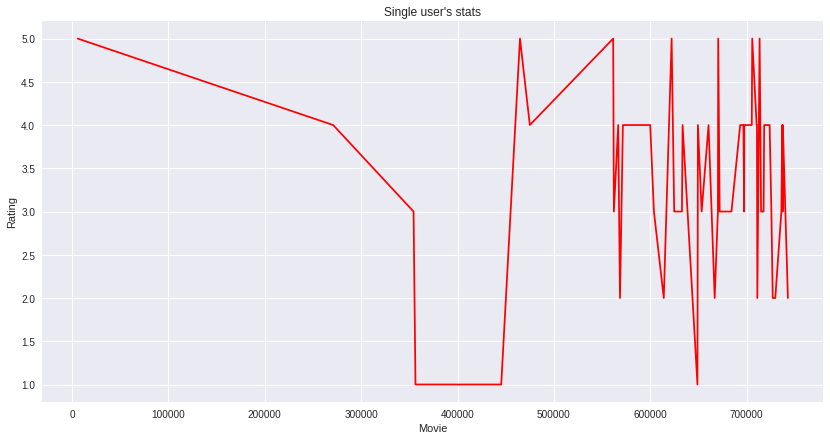

In [23]:
plt.xlabel('Movie')
plt.ylabel('Rating')
single_user_stats['rating'].plot(figsize=(14,7), title='Single user\'s stats', color=["red","blue"]);

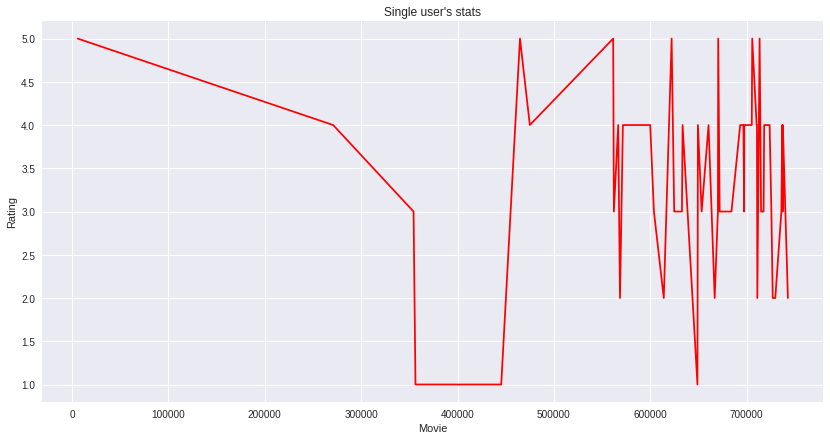

In [24]:
plt.xlabel('Movie')
plt.ylabel('Rating')
single_user_stats['rating'].plot(figsize=(14,7), title='Single user\'s stats', color=["red","blue"]);